In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif
import xgboost as xgb
import shap
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import seaborn as sns
shap.initjs()

/Users/ecen-urep/anaconda3/envs/SGC/lib/python3.11/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
file_path = "../dataset/final_cleaned_transformed_dataset.csv"
df = pd.read_csv(file_path)
X = df.drop("label", axis=1)
y = df['label']

In [4]:
model = xgb.XGBClassifier()
# model = ExtraTreesClassifier()
model.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

In [5]:
explainer = shap.Explainer(model, X)
shap_values = explainer(X)  

100%|===================| 2875314/2875392 [516:42<00:00]         

TypeError: 'numpy.float64' object is not iterable

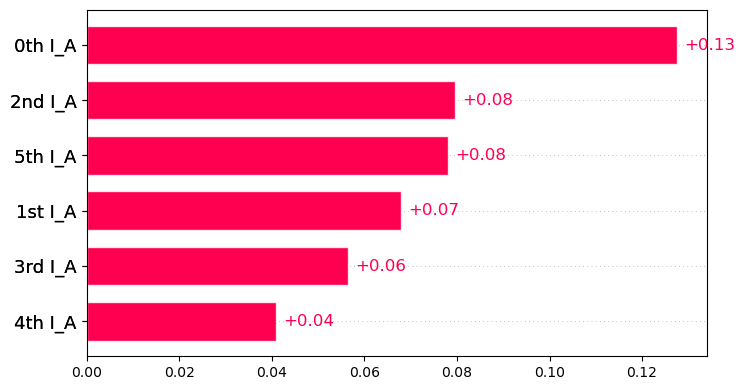

In [6]:
shap.plots.bar(shap_values[0])

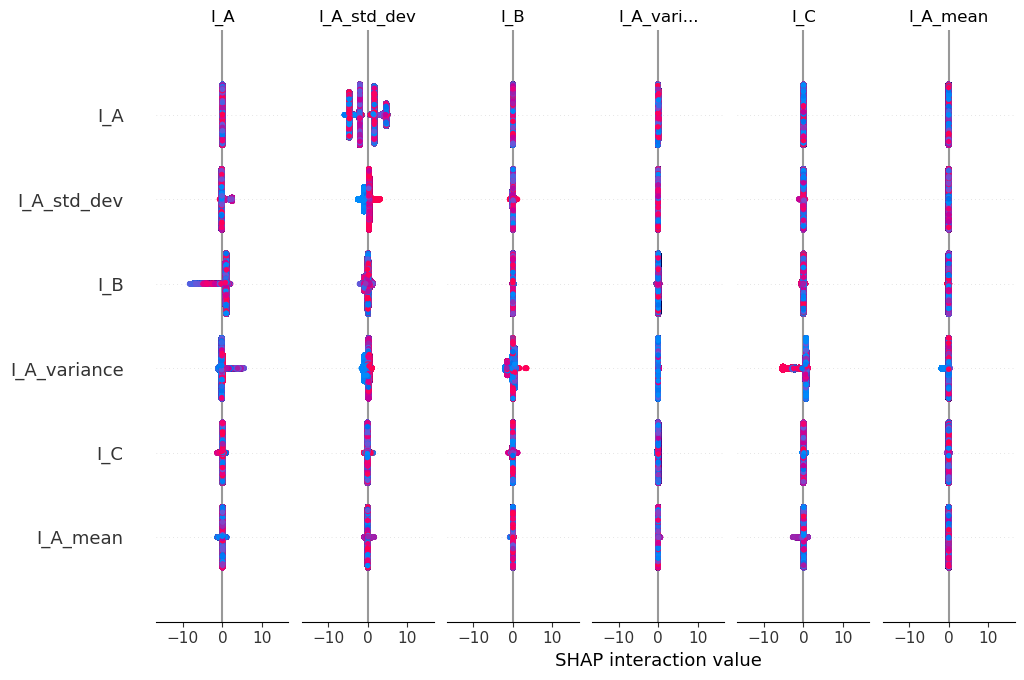

In [13]:
shap.summary_plot(shap_values, X, feature_names=X.columns)

IndexError: index 3 is out of bounds for axis 1 with size 3

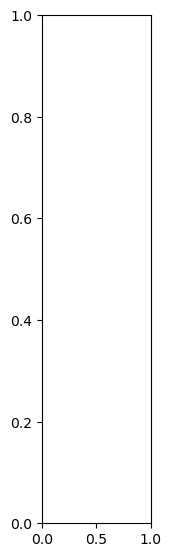

In [12]:
# List of specific features to include
target_features = ['I_A_fft_coeff_6', 'I_B_fft_coeff_6', 'I_C_fft_coeff_6']

# Ensure the selected features are valid
valid_features = [feature for feature in target_features if feature in X.columns]

# Filter SHAP values and features
shap_values_filtered = shap_values[:, [X.columns.get_loc(feature) for feature in valid_features]]
X_filtered = X[valid_features]

# Generate the SHAP summary plot
shap.summary_plot(shap_values_filtered, X_filtered, feature_names=valid_features)


In [9]:
print(shap_values.shape)

(479232, 150, 6)


In [10]:
print(target_features)
print(X.columns)


['I_A_fft_coeff_6', 'I_B_fft_coeff_6', 'I_C_fft_coeff_6']
Index(['I_A', 'I_B', 'I_C', 'I_A_mean', 'I_A_std_dev', 'I_A_variance',
       'I_A_skewness', 'I_A_kurtosis', 'I_A_fft_coeff_1', 'I_A_fft_coeff_2',
       ...
       'I_C_wavelet_coeff_17', 'I_C_wavelet_coeff_18', 'I_C_wavelet_coeff_19',
       'I_C_wavelet_coeff_20', 'I_C_signal_energy', 'I_C_first_diff',
       'I_C_second_diff', 'outlier_score_nbrs', 'outlier_score_if',
       'combined_outlier'],
      dtype='object', length=150)
